In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/ImageClassifier.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CustomDataSet/data/test/fried_rice/3232892.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._3232892.jpg  
  inflating: CustomDataSet/data/test/fried_rice/72138.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._72138.jpg  
  inflating: CustomDataSet/data/test/fried_rice/1658586.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._1658586.jpg  
  inflating: CustomDataSet/data/test/fried_rice/1047951.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._1047951.jpg  
  inflating: CustomDataSet/data/test/fried_rice/2518927.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._2518927.jpg  
  inflating: CustomDataSet/data/test/fried_rice/3333149.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._3333149.jpg  
  inflating: CustomDataSet/data/test/fried_rice/2817882.jpg  
  inflating: __MACOSX/CustomDataSet/data/test/fried_rice/._2817882.jpg  
  inflat

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
print(torch.__version__)
if torch.cuda.is_available():
  device = 'cuda'
elif torch.backends.mps.is_available():
  device = 'mps'
else:
  device = 'cpu'
print('using device: ',device)

2.5.1+cu124
using device:  cuda


In [ ]:
test_dir = '/content/CustomDataSet/data/test'
train_dir = '/content/CustomDataSet/data/train'

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485,0.456,0.406),std=(0.229,0.224,0.225))
])
test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
   transforms.Normalize(mean=(0.485,0.456,0.406),std=(0.229,0.224,0.225))
])

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir,transform=test_transform)

In [ ]:
len(train_data),len(test_data)

(2400, 800)

In [ ]:
classes_name=train_data.classes
print(classes_name)
classes_as_idx=train_data.class_to_idx
classes_as_idx

['donuts', 'french_fries', 'fried_rice', 'samosa']


{'donuts': 0, 'french_fries': 1, 'fried_rice': 2, 'samosa': 3}

In [ ]:
num_classes=len(train_data.classes)
print(num_classes)

4


In [ ]:
# create data loaders
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [ ]:
from model import CustomCNN
model=CustomCNN(num_classes=num_classes).to(device)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(
    model=model,
    input_size=(32,3,128,128),
    col_names=['input_size','output_size','num_params','trainable'],
    col_width=20,
    row_settings=['var_names'],
    )

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CustomCNN (CustomCNN)                    [32, 3, 128, 128]    [32, 4]              --                   True
├─Conv2d (conv1)                         [32, 3, 128, 128]    [32, 32, 128, 128]   896                  True
├─ReLU (relu)                            [32, 32, 128, 128]   [32, 32, 128, 128]   --                   --
├─MaxPool2d (pool)                       [32, 32, 128, 128]   [32, 32, 64, 64]     --                   --
├─Conv2d (conv2)                         [32, 32, 64, 64]     [32, 64, 64, 64]     18,496               True
├─ReLU (relu)                            [32, 64, 64, 64]     [32, 64, 64, 64]     --                   --
├─MaxPool2d (pool)                       [32, 64, 64, 64]     [32, 64, 32, 32]     --                   --
├─Conv2d (conv3)                         [32, 64, 32, 32]     [32, 128, 32, 32]    73,856               True
├─ReLU (relu)         

In [ ]:
from timeit import default_timer as timer
from trainNN import train

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(
    params=model.parameters(),
    lr=0.001
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
start=timer()
results=train(
    model=model,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=20,
    device=device
)
end=timer()
print(f'[INFO] Total training time: {end-start:.3f} seconds')


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3489 | train_acc: 0.3454 | test_loss: 1.2183 | test_acc: 0.4300
[INFO] New best model found! Saving model...
Epoch: 2 | train_loss: 1.1844 | train_acc: 0.4771 | test_loss: 1.1038 | test_acc: 0.5250
[INFO] New best model found! Saving model...
Epoch: 3 | train_loss: 1.0560 | train_acc: 0.5592 | test_loss: 0.9888 | test_acc: 0.5887
[INFO] New best model found! Saving model...
Epoch: 4 | train_loss: 0.9755 | train_acc: 0.6021 | test_loss: 0.9781 | test_acc: 0.5800
Epoch: 5 | train_loss: 0.8416 | train_acc: 0.6646 | test_loss: 0.9284 | test_acc: 0.6112
[INFO] New best model found! Saving model...
Epoch: 6 | train_loss: 0.6706 | train_acc: 0.7358 | test_loss: 0.9252 | test_acc: 0.6400
[INFO] New best model found! Saving model...
Epoch: 7 | train_loss: 0.4591 | train_acc: 0.8275 | test_loss: 1.0618 | test_acc: 0.6425
[INFO] New best model found! Saving model...
Epoch: 8 | train_loss: 0.2051 | train_acc: 0.9304 | test_loss: 1.2539 | test_acc: 0.6288
Epoch: 9 | train_l

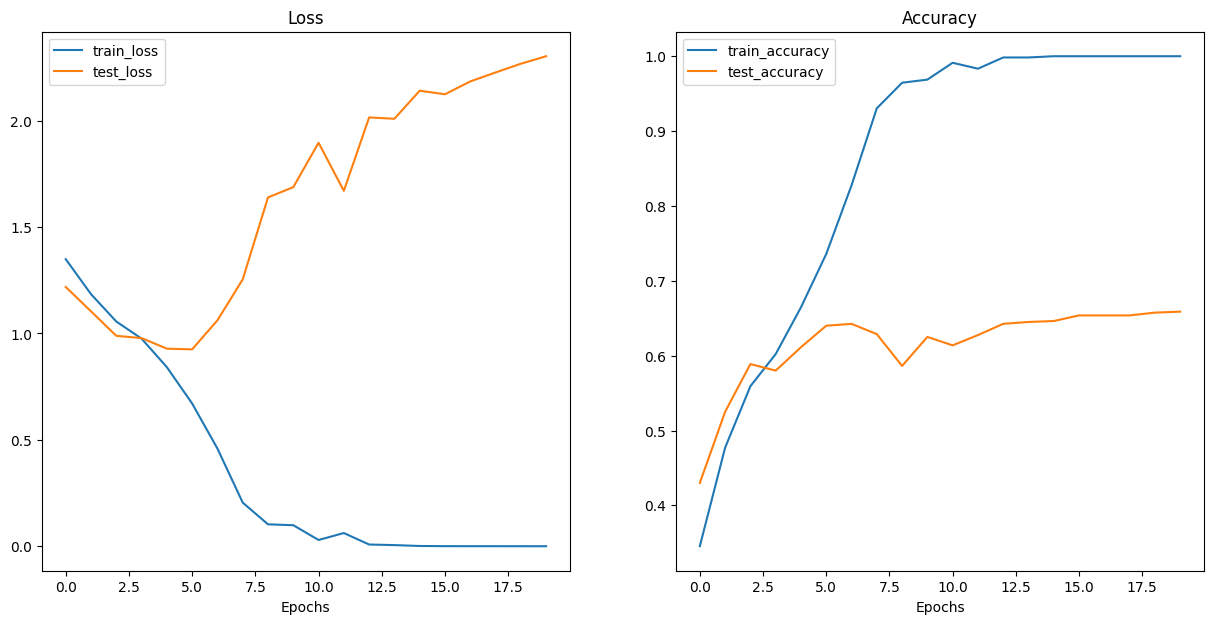

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(results)